# Excersice 2

### Multiclass, Multilabel classification problem.


### Reuters datasets, Keras.

In [1]:
from keras.datasets import reuters
import numpy as np

### Introduction

The exercise was taken from the book Deep Learning With Python, written by Francois Chollet. 

This is a multi-class classification problem, learning how to classify the probability distribution of each newswire for each class.

##### Dataset Details:
    1) 17,964 Reuters Newswire
    2) Split in 8,982 reviews for training and 8,982 reviews for testing;
    3) the labels are 46
    
##### We are going to create new variables where:
    
    1) train_data and train_labels will be used to train the model;
    2) test_data test_lables will be used to test how good is the model in classify un-known attributes;
    3) train_data and test_data are a list of reviews, each review is a list of word indices;
    4) train_labels and test_labels are list of 46 different values ranging between 0 and 46.
    

In [2]:
# splitting the Reutersdataset in Training test e and test set.
# num_words == we will keep only the most 10,000 used words, discarding rare words to decrease the vectors' size.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(train_data[0:2])

print('\n \n' + 'len:' + str(len(train_data)))

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])]

 
len:8982


In [4]:
print(train_labels)

print(max(train_labels))
print(min(train_labels))

print('\n \n' + 'len:' + str(len(train_labels)))

[ 3  4  3 ... 25  3 25]
45
0

 
len:8982


### What now ?  - Preparing Data
Now that we have our variables, we have to prepare them to feed the Neural Networks. Neural Networks infact aren't able to digest lists but we need tensors, so we need to turn these lists into tensors. But before starting it is better to mention and understand what a tensor is.

#### What is a tensor ? 

A tensor is a container for data, generally numerical data. To properly understand what a tensor is, it may help that matrices are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions.

    0D Tensor ==> Scalar
    1D Tensor ==> Vector
    2D Tensor ==> Matrices
    3D Tensor ==> Vector of Matrices
    4D Tensor ==> A Vector of Matrices vectors

##### Tensors' Key Attribute

    1) Number of axes(rank): A matrix has 2 axes, while a 3D tensor has 3 axes.

    2) Shape: tuple of integers that describe how many dimensions the tensor has along each axis. A scalar has an empty shape () while a vector of five elements a shape of (5, ), a 2D tensor a shape of (3, 5) and 3D tensor (3, 3, 5)
    
    3) Data Type: the type of the data contained in the tensor, could be float32 float64 and so on.
    
    
#### Preparing the data

##### Turning variables into tensor

So now we will turn the train_data and test_data variables from an array of list with 1 axis and shape (8982, ) to a tensor with two axes and shape (8982, 10000). Specifically, We will use a one-hot encode to turn our lists in vector of 0s and 1s. Inside these vector we will have 0, if the index of the world is not present within the list, otherwise we will have 1.

The same has to be done with labels.



In [5]:
# creating the vectorize_sequences function to turn the train_data values into a tensor.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train.shape

(8982, 10000)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
# we have also to turn the labels into tensor. 

def one_hot_encoding(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, sequence in enumerate(labels):
        results[i, sequence] = 1
        
    return results

one_hot_train_labels = one_hot_encoding(train_labels)
one_hot_test_labels = one_hot_encoding(test_labels)

In [9]:
# to vectorize the labels we can also use 

# from keras.utils.np.utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [10]:
one_hot_train_labels.shape

(8982, 46)

### Feeding the network

Once the data is ready to be fed to the network, it's time to create the network. Here a very simple network is used, with 3 layers and 64 hidden units for the first two and  46 hidden unit for the final layer. In the fist two layers we are using 64 hidden units, doing this the model will project the input data into a 64-dimensional representation space and will work on that to learn hints from data. It's important to notice that the number of hidden layers of the first layers are bigger than the number of the classes that we want to learn from. In the final layer we will have 46 hidden unit, because we want that the model output is the probability distribution of each newswires to over the 46 different classes .

#### Step

1) First we create the model using the command models from the keras module. In this case we are using a sequential model: A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. ( source : https://keras.io/guides/sequential_model/). To do this we use the following command:
    
    model = models.Sequential()
    
2) We create the stack of fully connected (Dense) layers. When we create the layer we have also to specify the activation function. For the first two layers we use the relu function meant to to zero out negative values while we will use a softmax function function in the last layer, because a softmax function will output a 46-dimensional vector with a probability distribution over the 46 different classes. To do so we use the following commands:

    model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(46, activation = 'softmax'))
    
    

3) At the end we have to set the loss function and the optimizer. In this case because we're facing a multi_class classification problem and the output is a probability distribution over the different classes, it's best to use the categorical_crossentropy loss. While as optimizer we will use rmsprop. But before we move forward it's best to explain why we need them:
    
loss function: how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
    
optimizer: the mechanism through which the network will update itself based on the data it sees and its loss function.
    
To do so we use the command compile:

    model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
        
    
    
    
In few words, the  loss function is the signal for the network to understand how good is predicting the value y_pred compared to the known target y. Starting from the value of the loss function the optimizer will works backward computing the new contribution that each parameter had in the loss value.

#### Recapping: 

    1) we start feeding the network with the data
    2) these data are processed by the various layers within the network and network starts learning 
    3) using loss function and an optimizer the network adapts and change the way its learning.
 

In [11]:
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# before we fit the model, we create a validation set, doing this we will be able to monitor the accuracy 
# of the model also in data that has never seen before.

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# here we set the epochs=20, meaning how many iterations the network do to learn and improve its performances.
# while the batch size defines the number of samples that will be propagated through the network. In this case 
# we're say to the model to divide the training set in x batch of 512 elements.

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 2.5668 - accuracy: 0.5267 - val_loss: 1.6892 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3767 - accuracy: 0.7125 - val_loss: 1.2714 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0168 - accuracy: 0.7814 - val_loss: 1.0973 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7962 - accuracy: 0.8322 - val_loss: 1.0076 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6375 - accuracy: 0.8659 - val_loss: 0.9522 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5106 - accuracy: 0.8935 - val_loss: 0.9038 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4124 - accuracy: 0.9157 - val_loss: 0.9030 - val_accuracy: 0.8020
Epoch 8/20
16

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Conclusion

Now that we have trained the model we will take some minutes to understand what was going on during the learning process. We will plot some metrics like Training loss, Validation loss and Training Accuracy and Validation Accuracy using the matplot module.

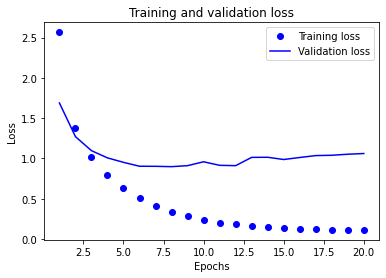

In [17]:
import matplotlib.pyplot as plt


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


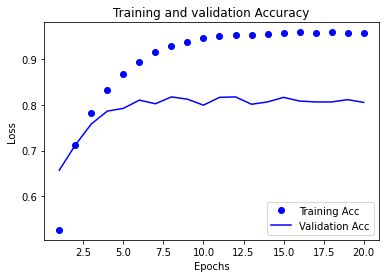

In [18]:
plt.clf()

val_acc = history_dict['val_accuracy']
plt.plot(epochs, accuracy , 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As we can see from the chart Training loss is decreasing iteration after iteration while accuracy is increasing each iteration. The problem is that validation loss and validation accuracy ( the metrics to perform the model on unknown data) after the nineth iteration have a different behaviour. These are clear symptoms of overfitting: the model is very good on predict known data, but not very good on predict unknown data affecting the goodness of the model. 

We will probably se how to solve overfitting in the next exercise.

In [19]:
# evaluating the performance of the model on predicting unknown data.
# we use the test set to check the performance using the accuracy metric.
results = model.evaluate(x_test, one_hot_test_labels)

results

71/71 [==============================] - 0s 1ms/step - loss: 1.2581 - accuracy: 0.7823


[1.2581285238265991, 0.7822796106338501]

As we can see the model has an accuracy of 85%, this means that it's able to predict correctly the 85% of the reviews.

### Let's see the output

In [20]:
predict = model.predict(x_test)

In [21]:
predict[0].shape

(46,)

In [22]:
np.sum(predict[0])

1.0

In [23]:
np.argmax(predict[0])

3